# Alura - Imersão Dados 3ª Edição

In [9]:
# importa módulo para esconder código
from esconde_codigo import esconde_codigo as esconde

## Aula 2: Estatísticas, visualização de dados e distribuições

In [5]:
# importa o pandas e lê os dados em csv a partir de uma url
# importa seaborn para os gráficos
# importa matplotlib para configurar os gráficos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression='zip')

In [6]:
# renomeia coluna droga
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [7]:
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
# Armazena os 05 compostos mais frequentes na variável compostos
compostos = dados['composto'].value_counts()[0:5]

In [5]:
# Armazena o index dos 05 compostos mais frequentes na variável cod_compostos
cod_compostos = dados['composto'].value_counts().index[0:5]

In [6]:
# Filtra as entradas do datafram em que o composto é um dos 05 mais frequentes
compostos_filtrados = dados.query('composto in @cod_compostos')

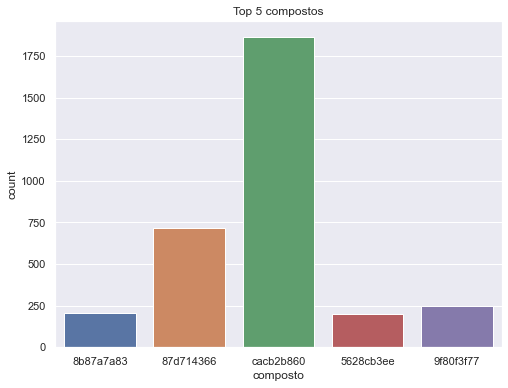

In [7]:
# Utiliza matplotlib para definir o tamanho do gráfico.
# Utiliza o seaborn para plotar um gráfico da contagem dos 05 compostos mais
# frequentes.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=compostos_filtrados)
ax.set_title('Top 5 compostos')
plt.show()

In [8]:
# Retorna o tamanho de g-0
len(dados['g-0'].unique())

14367

In [9]:
# Retorna o valor mínimo de g-0
dados['g-0'].min()

-5.513

In [10]:
# Retorna o valor máximo de g-0
dados['g-0'].max()

10.0

In [11]:
# Retorna o valor médio de g-0
dados['g-0'].mean()

0.24836629293692786

In [12]:
# Descreve o dataframe
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [13]:
# Seleciona todos os dados das colunas dos g's
dados.loc[:, 'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


<AxesSubplot:>

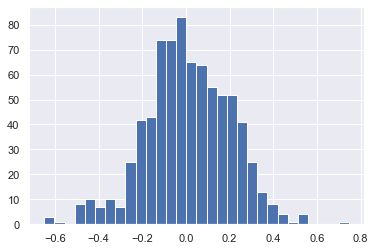

In [14]:
# Transforma colunas em indexes e plota um histograma da média de g's
dados.loc[:, 'g-0':'g-771'].describe().T['mean'].hist(bins=30)

<AxesSubplot:>

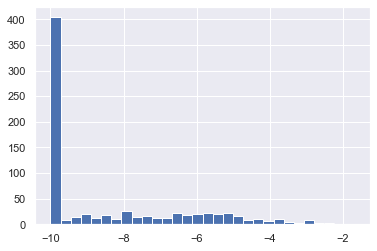

In [15]:
# Transforma colunas em indexes e plota um histograma dos mínimos de g's
dados.loc[:, 'g-0':'g-771'].describe().T['min'].hist(bins=30)

<AxesSubplot:>

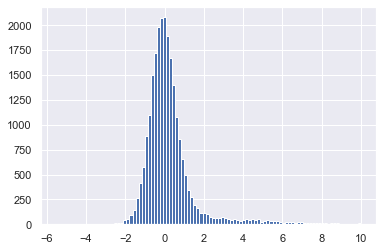

In [16]:
# Monta um histograma de g-0 com o pandas
dados['g-0'].hist(bins=100)

<AxesSubplot:>

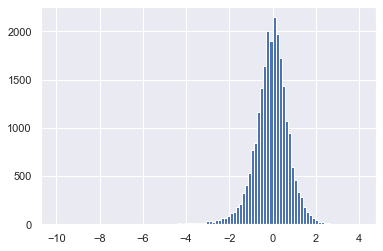

In [17]:
# Monta um histograma de g-19 com o pandas
dados['g-19'].hist(bins=100)

<AxesSubplot:>

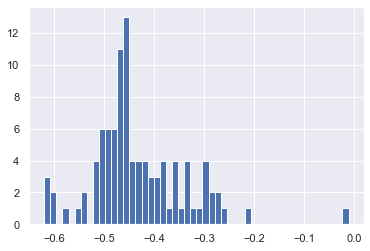

In [18]:
# Transforma colunas em indexes e plota um histograma da média de c's
dados.loc[:, 'c-0':'c-99'].describe().T['mean'].hist(bins=50)

<AxesSubplot:xlabel='g-0'>

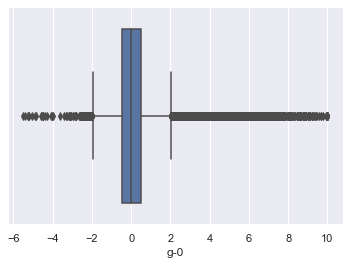

In [19]:
# Plota um gráfico do tipo boxplot de g-0
sns.boxplot(x='g-0', data=dados)

<AxesSubplot:xlabel='tratamento', ylabel='g-0'>

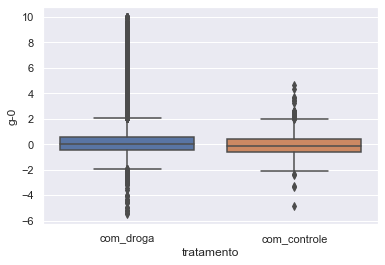

In [20]:
# Plota um gráfico do tipo boxplot de tratamento com tratamento
# e com g-0 como eixo y
sns.boxplot(y='g-0', x='tratamento', data=dados)

## Desafios da Aula 2

### Desafio 01: Ordenar o gráfico countplot

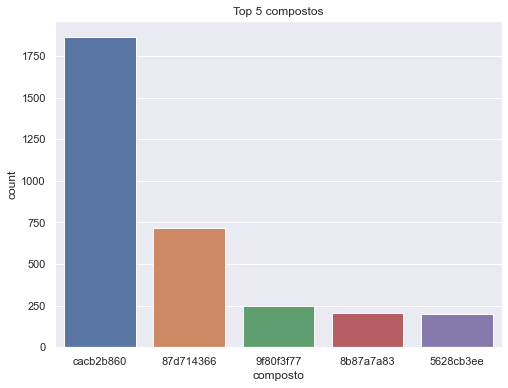

In [8]:
# A ordenação se dá pela utilização da opção 'order' de countplot, informando
# o array com os indexes dos 05 compostos mais frequentes contido em cod_compostos
cod_compostos = dados['composto'].value_counts().index[0:5]

compostos_filtrados = dados.query('composto in @cod_compostos')

plt.figure(figsize=(8,6))
ax = sns.countplot(x='composto', data=compostos_filtrados, order=cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()

# Esconde / mostra célula
esconde()

### Desafio 02: Melhorar a visualização alterando tamanho de fonte, legendas, etc

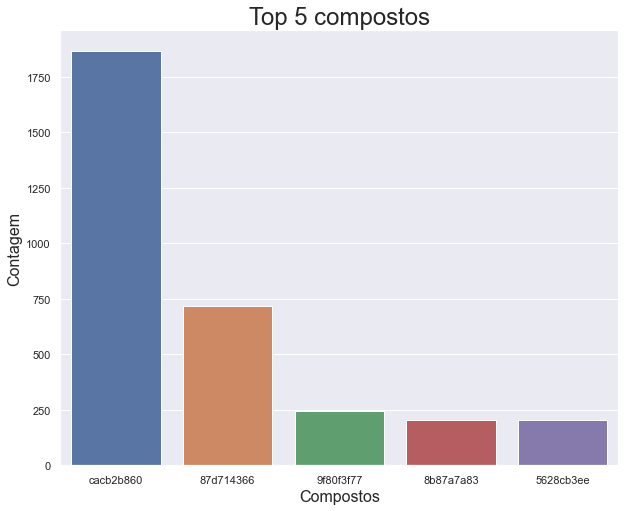

In [22]:
# Para configurar as legendas de eixos x e y, usa-se set_xlabel e set_ylabel,
# respectivamente.
# Mudança de tamanho de fonte é feita com a opção 'fontsize'
cod_compostos = dados['composto'].value_counts().index[0:5]

compostos_filtrados = dados.query('composto in @cod_compostos')

plt.figure(figsize=(10,8))
ax = sns.countplot(x='composto', data=compostos_filtrados, order=cod_compostos)
ax.set_title('Top 5 compostos', fontsize=24)
ax.set_xlabel('Compostos', fontsize=16)
ax.set_ylabel('Contagem', fontsize=16)
plt.show()

### Desafio 03: plotar os histogramas com o seaborn

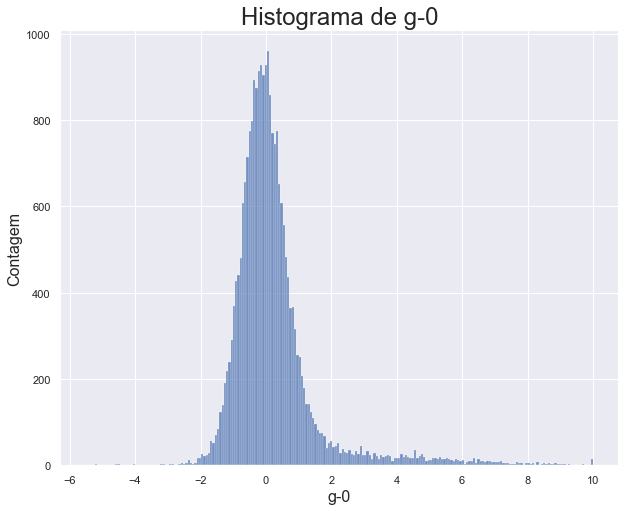

In [23]:
# Para plotar um histograma com o seaborn utiliza-se 'histplot'.
# A opção
plt.figure(figsize=(10,8))
ax = sns.histplot(x='g-0', data=dados)
ax.set_title('Histograma de g-0', fontsize=24)
ax.set_xlabel('g-0', fontsize=16)
ax.set_ylabel('Contagem', fontsize=16)
plt.show()

### Desafio 04: estudar sobre as estatísticas retornadas pelo método describe

Item   | significado
-------|------------
count  | contagem dos valores existentes não nulos da amostragem
mean   | Média dos valores da amostragem
min    | Valor mínimo da amostragem
std    | Desvio padrão (uniformidade) da amostragem
25%    | Percentual mais baixo
50%    | Percentual médio
75%    | Percentual mais alto
max    | Valor máximo da amostragem

*Fonte*: [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [24]:
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


### Desafio 05: Refletir sobre a manipulação dos tamanhos das visualizações

Configurar o tamanho das visualizações pode melhorar a legibilidade e proporciona uma melhor identificação dos detalhes e nuances  dos gráficos.

### Desafio 06: Fazer outras análises com o boxplot e com o histograma

#### Boxplot


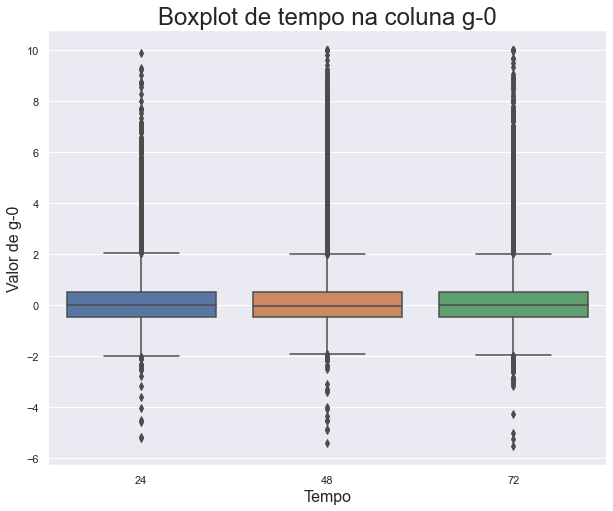

In [25]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='tempo', y='g-0', data=dados)
ax.set_title('Boxplot de tempo na coluna g-0', fontsize=24)
ax.set_xlabel('Tempo', fontsize=16)
ax.set_ylabel('Valor de g-0', fontsize=16)
plt.show()

#### Histograma

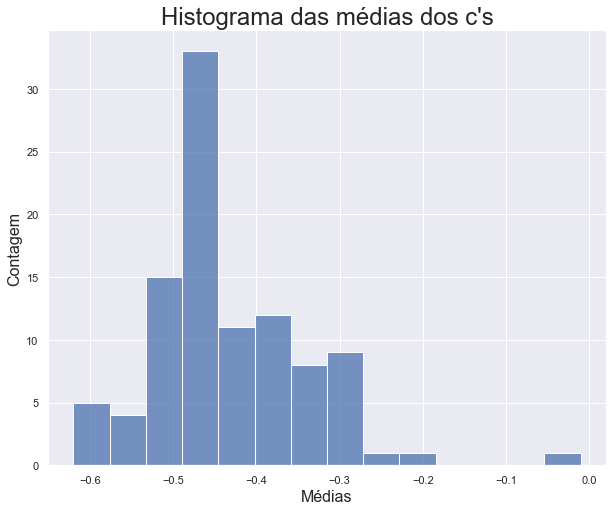

In [26]:
medias_c = dados.loc[:, 'c-0':'c-99'].describe().T['mean']

plt.figure(figsize=(10,8))
ax = sns.histplot(data=medias_c)
ax.set_title('Histograma das médias dos c\'s', fontsize=24)
ax.set_xlabel('Médias', fontsize=16)
ax.set_ylabel('Contagem', fontsize=16)
plt.show()

### Desafio 07: Resumo do que foi aprendido

Nesta aula aprendemos a utilizar a biblioteca Seaborn para apresentar gráficos mais elaborados. Com ele conseguimos deixar nossos gráficos mais legíveis, manipulando configurações que impactam no tamanho do gráfico e das fontes das legendas

Aprendemos, também, a descrever nosso dataframe com o método *describe*, que retorna informações úteis como médias de valores, valores mínimos e máximos, etc.

Explorando um pouco mais o dataframe, aprendemos que as colunas nomeadas como *g* se referem à expressões genéticas e as nomeadas com *c* se referem a linhagens celulares nos quais foram testados os fármacos.